<a href="https://colab.research.google.com/github/QIRoss/Colab-AI-Stuff/blob/main/confusion_matrix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import tensorflow as tf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [5]:
np.random.seed(42)
num_classes = 10
y_true = np.random.randint(0, num_classes, 100)
y_pred = np.random.randint(0, num_classes, 100)

In [6]:
conf_mat = tf.math.confusion_matrix(labels=y_true, predictions=y_pred).numpy()

In [7]:
conf_mat_norm = np.round(conf_mat.astype('float') / conf_mat.sum(axis=1)[:, np.newaxis], decimals=2)


In [8]:
classes = list(range(num_classes))
conf_mat_df = pd.DataFrame(conf_mat_norm, index=classes, columns=classes)

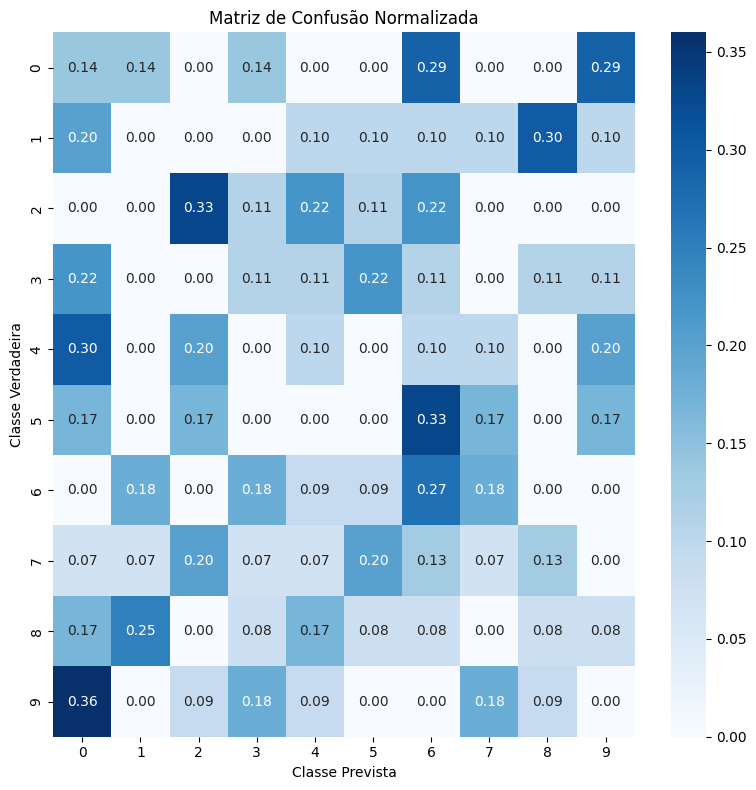

In [9]:
plt.figure(figsize=(8, 8))
sns.heatmap(conf_mat_df, annot=True, fmt=".2f", cmap="Blues")
plt.title("Matriz de Confusão Normalizada")
plt.xlabel("Classe Prevista")
plt.ylabel("Classe Verdadeira")
plt.tight_layout()
plt.show()

In [16]:
def calcular_metricas_matriz(conf_mat):
    VP = np.diag(conf_mat)
    FN = conf_mat.sum(axis=1) - VP
    FP = conf_mat.sum(axis=0) - VP
    VN = conf_mat.sum() - (FP + FN + VP)

    sensibilidade = VP / (VP + FN)
    especificidade = VN / (FP + VN)
    precisao = VP / (VP + FP)

    f_score = np.zeros_like(precisao)
    for i in range(len(precisao)):
        if (precisao[i] + sensibilidade[i]) > 0:
            f_score[i] = 2 * (precisao[i] * sensibilidade[i]) / (precisao[i] + sensibilidade[i])

    acuracia = (VP + VN) / conf_mat.sum()

    sensibilidade = np.nan_to_num(sensibilidade)
    especificidade = np.nan_to_num(especificidade)
    precisao = np.nan_to_num(precisao)

    metrics = {
        "Acurácia Média": np.mean(acuracia),
        "Sensibilidade Média": np.mean(sensibilidade),
        "Especificidade Média": np.mean(especificidade),
        "Precisão Média": np.mean(precisao),
        "F-Score Médio": np.mean(f_score)
    }

    return metrics

metricas = calcular_metricas_matriz(conf_mat)

print("\nMétricas de Avaliação (Globais):")
for metrica, valor in metricas.items():
    print(f"{metrica}: {valor:.2f}")



Métricas de Avaliação (Globais):
Acurácia Média: 0.82
Sensibilidade Média: 0.11
Especificidade Média: 0.90
Precisão Média: 0.10
F-Score Médio: 0.10
